In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

In [34]:
data = {'Task':{
    0:'Elaboración de protocolo.',
    1:'Documentación y notas.',
    2:'Selección de plataforma.',
    3:'Evaluación y compras.',
    4:'Diseño de datums y componentes.',
    5:'Ensamblaje de componentes.',
    6:'Ingeniería inversa de ensamble.',
    7:'Bocetaje de superficie.',
    8:'Diseño CAD de superficie.',
    9:'Impresión de superficie.',
    10:'Instalación de software.',
    11:'Recolección de datos.',
    12:'Entrenamiento del modelo.',
    13:'Testeo de modelo en prototipo.',
    14:'Fin de proyecto.'
},

'Department': {
    0:'Planeación',
    1:'Planeación',
    2:'Planeación',
    3:'Planeación',
    4:'Diseño',
    5:'Manufactura',
    6:'Diseño',
    7:'Diseño',
    8:'Diseño',
    9:'Manufactura',
    10:'Software',
    11:'Pruebas',
    12:'Pruebas',
    13:'Pruebas',
    14:'Resultados'
},

'Start': {
    0: Timestamp('2023-06-01 00:00:00'),
    1: Timestamp('2023-06-16 00:00:00'),
    2: Timestamp('2023-06-16 00:00:00'),
    3: Timestamp('2023-06-26 00:00:00'),
    4: Timestamp('2023-07-11 00:00:00'),
    5: Timestamp('2023-07-23 00:00:00'),
    6: Timestamp('2023-07-28 00:00:00'),
    7: Timestamp('2023-08-02 00:00:00'),
    8: Timestamp('2023-08-17 00:00:00'),
    9: Timestamp('2023-09-16 00:00:00'),
    10: Timestamp('2023-10-01 00:00:00'),
    11: Timestamp('2023-10-16 00:00:00'),
    12: Timestamp('2023-10-26 00:00:00'),
    13: Timestamp('2023-11-09 00:00:00'),
    14: Timestamp('2023-11-17 00:00:00')
},

'End': {
    0: Timestamp('2023-06-16 00:00:00'),
    1: Timestamp('2023-11-25 00:00:00'),
    2: Timestamp('2023-06-26 00:00:00'),
    3: Timestamp('2023-07-11 00:00:00'),
    4: Timestamp('2023-07-23 00:00:00'),
    5: Timestamp('2023-07-28 00:00:00'),
    6: Timestamp('2023-08-02 00:00:00'),
    7: Timestamp('2023-08-17 00:00:00'),
    8: Timestamp('2023-09-16 00:00:00'),
    9: Timestamp('2023-10-06 00:00:00'),
    10: Timestamp('2023-10-16 00:00:00'),
    11: Timestamp('2023-10-26 00:00:00'),
    12: Timestamp('2023-11-09 00:00:00'),
    13: Timestamp('2023-11-17 00:00:00'),
    14: Timestamp('2023-12-01 00:00:00')
},

'Completion': {
    0: 0.8,
    1: 0.0,
    2: 0.0,
    3: 0.0,
    4: 0.0,
    5: 0.0,
    6: 0.0,
    7: 0.0,
    8: 0.0,
    9: 0.0,
    10: 0.0,
    11: 0.0,
    12: 0.0,
    13: 0.0,
    14: 0.0
}}

In [35]:
##### DATA PREP ##### 
df = pd.DataFrame(data)

In [36]:
df.head()

,Task,Department,Start,End,Completion
0,Elaboración de protocolo.,Planeación,2023-06-01,2023-06-16,0.8
1,Documentación y notas.,Planeación,2023-06-16,2023-11-25,0.0
2,Selección de plataforma.,Planeación,2023-06-16,2023-06-26,0.0
3,Evaluación y compras.,Planeación,2023-06-26,2023-07-11,0.0
4,Diseño de datums y componentes.,Diseño,2023-07-11,2023-07-23,0.0


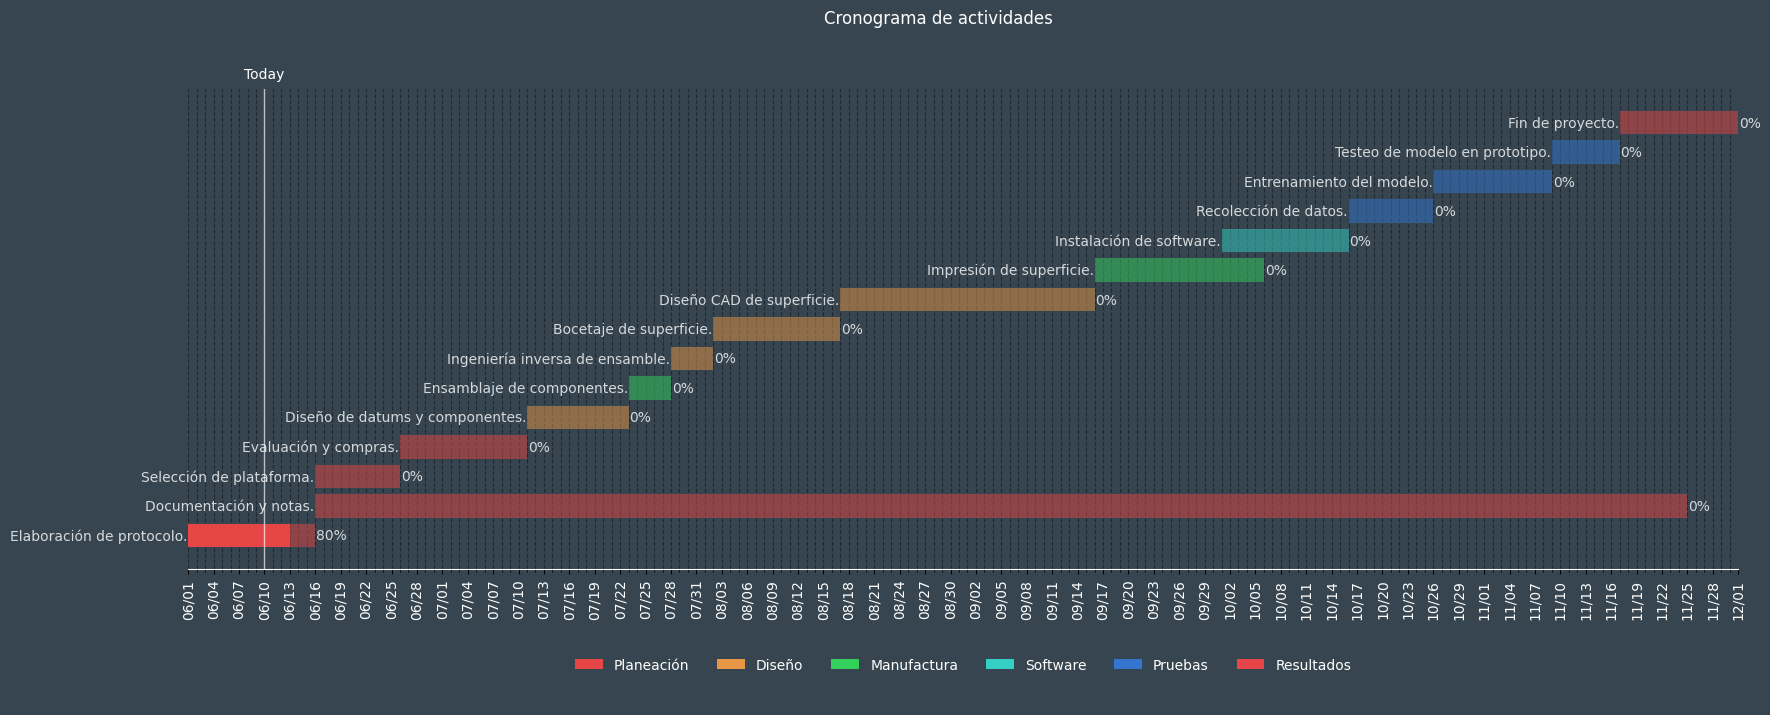

In [37]:
# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'Planeación':'#E64646', 'Diseño':'#E69646', 'Manufactura':'#34D05C', 'Software':'#34D0C3', 'Pruebas':'#3475D0', 'Resultados':'#E64646'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(20,8), gridspec_kw={'height_ratios':[6, 1]}, facecolor='#36454F')
ax.set_facecolor('#36454F')
ax1.set_facecolor('#36454F')
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8, color='w')
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8, color='w')


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')

# ticks
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3], color='w', rotation = 90)
ax.set_yticks([])

plt.setp([ax.get_xticklines()], color='w')

# align x axis
ax.set_xlim(0, df.end_num.max())

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')


plt.suptitle('Cronograma de actividades', color='w')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Planeación'),
                   Patch(facecolor='#E69646', label='Diseño'),
                   Patch(facecolor='#34D05C', label='Manufactura'),
                   Patch(facecolor='#34D0C3', label='Software'),
                   Patch(facecolor='#3475D0', label='Pruebas'),
                   Patch(facecolor='#E64647', label='Resultados')]

legend = ax1.legend(handles=legend_elements, loc='center', ncol=6, frameon=False, borderpad = 0.9)
plt.setp(legend.get_texts(), color='w')

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Get "Today" value from sys date/ date.today()
#from datetime import date
#today = pd.Timestamp(date.today())
#today = today - proj_start

# Get "Today" value from custom timestamp
today = Timestamp('2023-06-10 00:00:00') 
today = today - proj_start

# plot line for today
ax.axvline(today.days, color='w', lw=1, alpha=0.7)
ax.text(today.days, len(df)+0.5, 'Today', ha='center', color='w')

plt.savefig('gantt.png', facecolor='#36454F')